# Aula 7 - Machine Learning

# Demo 15 - XGBoost

### Prof. Dr. Ahirton Lopes (profahirton.lopes@fiap.com.br)

O XGBoost (Extreme Gradient Boosting) é uma biblioteca popular e eficiente para aprendizado de máquina, especialmente projetada para resolver problemas de classificação e regressão. Ele é uma implementação otimizada de Gradient Boosting, um algoritmo de aprendizado supervisionado que combina múltiplos modelos fracos (normalmente árvores de decisão) para formar um modelo forte.

O XGBoost se destaca por sua alta performance e eficiência computacional. Sua popularidade cresceu devido ao seu uso em competições de aprendizado de máquina, como o Kaggle, onde muitos participantes usam o XGBoost para obter resultados de ponta em uma variedade de tarefas.

Características do XGBoost:

- Boosting: O XGBoost usa o método de boosting, no qual as previsões de modelos fracos (árvores de decisão) são combinadas de forma sequencial. A cada iteração, o erro do modelo anterior é corrigido pelo próximo modelo, melhorando o desempenho global.

- Regularização: O XGBoost inclui regularização L1 (Lasso) e L2 (Ridge), que ajudam a prevenir overfitting e melhoram a generalização do modelo.

- Paralelização: O XGBoost é altamente eficiente devido à sua capacidade de realizar paralelização, o que acelera o processo de treinamento em grandes volumes de dados.

- Manejo de Missing Values: O XGBoost tem a capacidade de lidar com valores ausentes automaticamente durante o treinamento.

- Interpretação: Embora o XGBoost seja um modelo de caixa preta, existem técnicas como o SHAP (SHapley Additive exPlanations) que ajudam a interpretar como o modelo toma suas decisões.

In [ ]:
!sudo pip install xgboost

In [ ]:
!sudo pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # training step
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [ ]:
bst = xgb.train(param, dtrain, num_round) #train model

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:23:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
bst.dump_model('dump.raw.txt') #overview of model

In [ ]:
preds = bst.predict(dtest)

In [ ]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

1.0


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, best_preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, best_preds))

1.0


Vamos tentar um conjunto de dados um pouco mais complexo!

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:24:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


training time: 1.5811469554901123
testing time: 0.0019698143005371094
precision: 0.9583333333333334
accuracy: 0.956140350877193


[Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 23.52222222222222, 'Predicted'),
 Text(0.5, 1.0, 'Breast Cancer Confusion Matrix')]

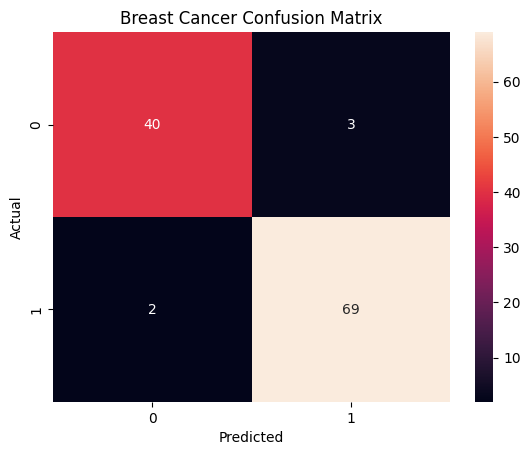

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
import time
from seaborn import heatmap

#Load and split dataset into train and test
breast_data = datasets.load_breast_cancer()
X = breast_data.data
y = breast_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix stacks vectors to create data matrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set xgboost params
param = {
'max_depth': 3,  # the maximum depth of each tree
'eta': 0.3,  # the training step for each iteration
'silent': 1,  # logging mode - quiet
'objective': 'multi:softprob',  # error evaluation for multiclass training
'num_class': 2}  # the number of classes that exist in this datset
num_round = 50  # the number of training iterations

# train
start = time.time()
bst = xgb.train(param, dtrain, num_round)
end = time.time()
print("training time:", end - start)

# test
start = time.time()
preds = [np.argmax(prediction) for prediction in bst.predict(dtest)]
end = time.time()
print("testing time:", end - start)

# results
print("precision:", precision_score(y_test, preds))
print("accuracy:", accuracy_score(y_test, preds))
conf_mat = confusion_matrix(y_test, preds)
ax = heatmap(conf_mat, annot=True, fmt='.4g')
ax.set(ylabel="Actual", xlabel="Predicted", title="Breast Cancer Confusion Matrix")

Comparação com o AdaBoost

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Training time: 0.4244556427001953
Testing time: 0.011977434158325195
Precision: 0.958904109589041
Accuracy: 0.9649122807017544


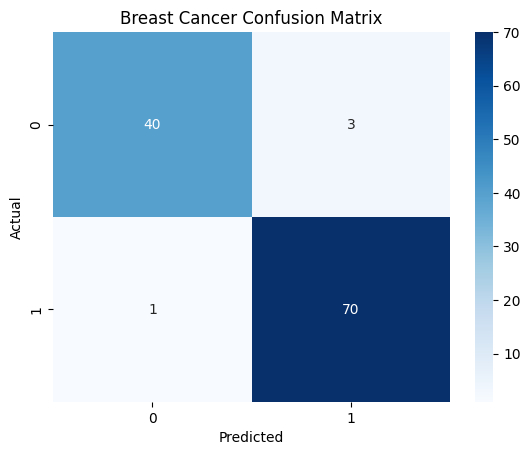

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Load and split dataset
breast_data = datasets.load_breast_cancer()
X = breast_data.data
y = breast_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set AdaBoost params
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.3, algorithm='SAMME')

# Train
start = time.time()
ada_fit = ada.fit(X_train, y_train)
end = time.time()
print("Training time:", end - start)

# Test
start = time.time()
preds = ada_fit.predict(X_test)
end = time.time()
print("Testing time:", end - start)

# Results
print("Precision:", precision_score(y_test, preds))
print("Accuracy:", accuracy_score(y_test, preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_mat, annot=True, fmt='.4g', cmap="Blues")
ax.set(ylabel="Actual", xlabel="Predicted", title="Breast Cancer Confusion Matrix")

plt.show()

O algoritmo SAMME tem melhor desempenho do que o algoritmo SAMME.R em termos de acurácia, precisão e recall no conjunto de teste, mas o SAMME é mais lento porque o algoritmo leva mais tempo para convergir.

A diferença é que o SAMME.R usa pontuações de probabilidade para atualizar pesos, enquanto o SAMME.R usa apenas classificação.

Para um problema binário, faz sentido que o SAMME provavelmente teria melhor desempenho.

# Conclusão

Esta foi uma análise rápida e, na verdade, apenas um experimento para explorar o xgboost depois de ler sobre ele.

Em geral, o xgboost foi consideravelmente mais rápido do que o AdaBoost, provavelmente devido à sua otimização da descida do gradiente e uso do softprob em vez da perda exponencial como uma função de custo.

Honestamente, o AdaBoost e o xgboost não são ótimas comparações neste exemplo porque eles atualizam e iteram de maneiras muito diferentes. A semelhança é que ambos usam um conjunto de árvores de decisão para fazer previsões.